In [1]:
import scipy.io
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import esmtools as et
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm

/Users/ribr5703/anaconda/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [73]:
mat = scipy.io.loadmat('SOCATv4_data_count.mat')

# Global

In [74]:
def create_global_da(dat, lat, lon, name=None):
    """
    Create a DataArray of global SOCAT obs count.
    """
#    dat[np.isnan(dat)] = np.nan
    lon, lat = np.meshgrid(lon, lat)
    da = xr.DataArray(dat, dims=['lat', 'lon'])
    da['longitude'] = (('lat', 'lon'), lon)
    da['latitude'] = (('lat', 'lon'), lat)
    da.name = name
    return da

In [75]:
da = create_global_da(mat['data_count_nan'], mat['lat'], mat['lon'])

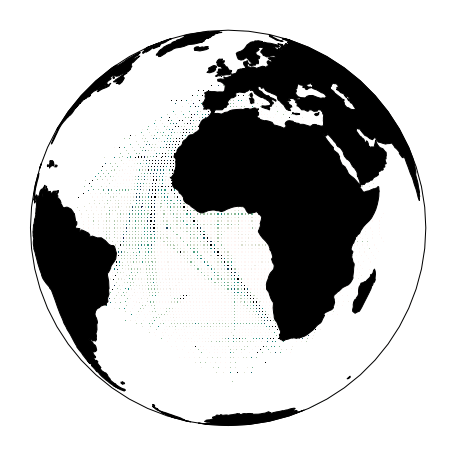

In [55]:
f, ax = et.vis.make_cartopy(figsize=(8,8), grid_lines=False, 
                            projection=ccrs.Orthographic())

# setup colormap
cmap = cm.tempo
cmap.set_over('k')

# plot
p1 = plt.pcolormesh(da.longitude, da.latitude, da, transform=ccrs.PlateCarree(), 
               vmin=1, vmax=1000, cmap=cmap, edgecolors='w')

#if REG == 'ATL':
#    ax.set_extent([-89, 89, -90, 90], crs=ccrs.PlateCarree())
#else:
#    ax.set_extent([-179, -1, -90, 90], crs=ccrs.PlateCarree())

#cb = plt.colorbar(extend="max", orientation='vertical', pad=0.05, 
#             fraction=0.05, ticks=[1, 1000, 2000, 3000, 4000, 5000])

#et.vis.savefig('orthographic_cbar', extension='.eps', dpi=300)

# Single System

In [ ]:
def create_EBUS_da(dat, name=None):
    """
    Create a DataArray from the input numpy array.
    """
    dat[np.isnan(dat)] = 0
    da = xr.DataArray(dat, dims=['lat', 'lon'])
    da.name = name
    return da

In [ ]:
cal = create_da(mat['data_count_CA'], name='CalCS')
hum = create_da(mat['data_count_Peru'], name='HumCS')
can = create_da(mat['data_count_Canary'], name='CanCS')
ben = create_da(mat['data_count_Benguela'], name='BenCS')

In [ ]:
ds = xr.merge([cal, hum, can, ben])
ds['lon'] = mat['lon'].squeeze()
ds['lat'] = mat['lat'].squeeze()

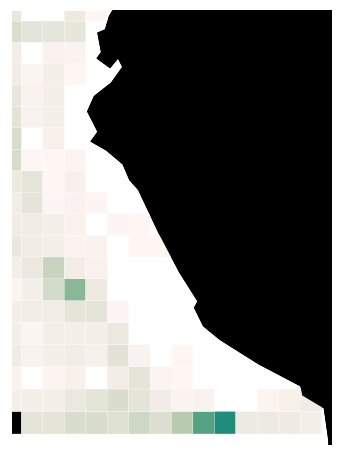

In [124]:
EBC = 'HumCS'

f, ax = et.vis.make_cartopy(figsize=(8,8), grid_lines=False, frameon=False,
                            projection=ccrs.Mercator())
cmap = cm.tempo
cmap.set_over('k')
x0, x1, y0, y1 = et.ebus.visual_bounds(EBC)
ax.set_extent([x0, x1, y0, y1])

p = plt.pcolor(ds.lon-1, ds.lat, ds[EBC], transform=ccrs.PlateCarree(), 
               vmin=1, vmax=5000, cmap=cmap, edgecolors='w')
ax.add_feature(cfeature.LAND, facecolor='k', zorder=4)
#ax.set_aspect('auto')


#plt.colorbar(p, ticks=[1, 1000, 2000, 3000, 4000, 5000],
#             extend="max", orientation='horizontal', pad=0.02,
#             fraction=0.05)

#et.vis.savefig(EBC + '_data_density', extension='.eps', dpi=300)

# Try Orthographic

In [204]:
REG = 'ATL'

if REG == 'ATL':
    ds2 = ds['BenCS'] + ds['CanCS']
    dat = ds2.values
    dat[dat==0] = np.nan
    ds2 = xr.DataArray(dat)
    ctl_lng = 0
elif REG == 'PAC':
    ds2 = ds['CalCS'] + ds['HumCS']
    dat = ds2.values
    dat[dat==0] = np.nan
    ds2 = xr.DataArray(dat)
    ctl_lng = -90

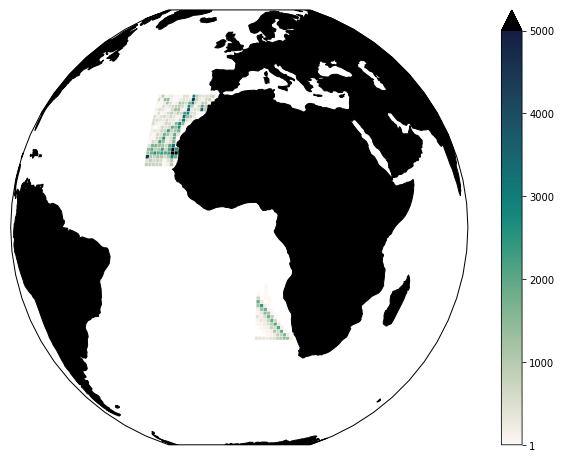

In [216]:
f, ax = et.vis.make_cartopy(grid_lines=False,
                            projection=ccrs.Orthographic(central_longitude=
                                                         ctl_lng))

# setup colormap
cmap = cm.tempo
cmap.set_over('k')

# plot
p1 = plt.pcolor(ds.lon-1, ds.lat, ds2, transform=ccrs.PlateCarree(), 
               vmin=1, vmax=5000, cmap=cmap, edgecolors='w')

if REG == 'ATL':
    ax.set_extent([-89, 89, -90, 90], crs=ccrs.PlateCarree())
else:
    ax.set_extent([-179, -1, -90, 90], crs=ccrs.PlateCarree())

cb = plt.colorbar(extend="max", orientation='vertical', pad=0.05, 
             fraction=0.05, ticks=[1, 1000, 2000, 3000, 4000, 5000])

#et.vis.savefig('orthographic_cbar', extension='.eps', dpi=300)